In [1]:
import numpy as np
import cv2
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm
rdmod = '/home/charles/Documents/UCL/ACHRI/models/EmotiW/' 

from skimage import transform
model = rdmod+'deploy.txt'
weights = rdmod+'EmotiW_VGG_S.caffemodel'

caffe_root = '~/Downloads/caffe-master/' 

import sys
sys.path.insert(0, caffe_root + 'python')
import caffe


In [10]:
mean_filename='./mean.binaryproto'
proto_data = open(rdmod+mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean = caffe.io.blobproto_to_array(a)[0]
categories = [ 'Angry' , 'Disgust' , 'Fear' , 'Happy'  , 'Neutral' ,  'Sad' , 'Surprise']

In [47]:
VGG_S_Net = caffe.Classifier(model, weights, mean=mean, channel_swap=(2,1,0), raw_scale=255, image_dims=(256, 256))

(1, 3, 224, 224)


In [6]:
ls

emotiw_demo.ipynb                     proc_anger/
FaceDetectionVGG.ipynb                proc_fear/
getting-EmotiW-feature-vectors.ipynb  proc_happy/
getting-VGG-feature-vectors.ipynb     proc_neutral/
preparing-the-dataset.ipynb           proc_sad/


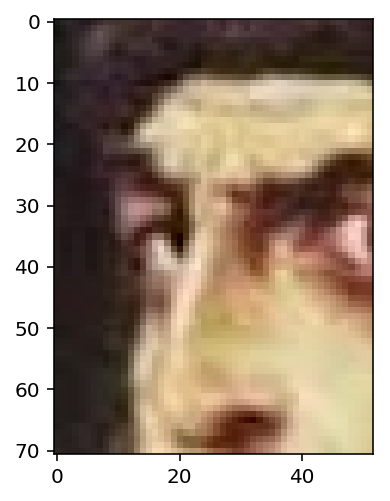

In [36]:
example_image='./proc_anger/crop/11.jpeg'
input_image = caffe.io.load_image(example_image)
#imgP = transform.resize(input_image, (256, 256, 3))
plt.imshow(input_image)

In [37]:
prediction = VGG_S_Net.predict([input_image],oversample=False)
for idx, cat in enumerate(categories):
    print('{:12} {:.2f}'.format(cat, prediction[0][idx]))
print('')
print('predicted category is {0}'.format(categories[prediction.argmax()]), prediction[0].max())

Angry        0.99
Disgust      0.01
Fear         0.00
Happy        0.00
Neutral      0.00
Sad          0.00
Surprise     0.00

predicted category is Angry 0.990573


In [44]:
.data.shape

(1, 4048)

In [54]:
VGG_S_Net = caffe.Classifier(model, weights, mean=mean, channel_swap=(2,1,0), raw_scale=255, image_dims=(256, 256))

(1, 3, 224, 224)


In [55]:
tp = './proc_fear/crop/'
tp_ = './proc_fear/feats/'

In [56]:
tot=len([name for name in os.listdir(tp)])
count=0
feats=np.zeros((tot,4048))
for file in tqdm(os.listdir(tp)):
    id=int(file.strip('.jpeg'))
    input_image = caffe.io.load_image(tp+file)
    prediction = VGG_S_Net.predict([input_image],oversample=False)
    feat=VGG_S_Net.blobs['fc7']
    feats[id-1,:] =feat.data[0]
    count+=1
print('!!!------FINISHED-----!!!')


100%|██████████| 659/659 [06:20<00:00,  1.74it/s]

!!!------FINISHED-----!!!


In [57]:
np.save(tp_+'emo.npy', feats)

In [58]:
VGG_S_Net = caffe.Classifier(model, weights, mean=mean, channel_swap=(2,1,0), raw_scale=255, image_dims=(256, 256))

(1, 3, 224, 224)


In [59]:
tp = './proc_anger/crop/'
tp_ = './proc_anger/feats/'

In [60]:
tot=len([name for name in os.listdir(tp)])
count=0
feats=np.zeros((tot,4048))
for file in tqdm(os.listdir(tp)):
    id=int(file.strip('.jpeg'))
    input_image = caffe.io.load_image(tp+file)
    prediction = VGG_S_Net.predict([input_image],oversample=False)
    feat=VGG_S_Net.blobs['fc7']
    feats[id-1,:] =feat.data[0]
    count+=1
print('!!!------FINISHED-----!!!')

100%|██████████| 695/695 [06:46<00:00,  1.71it/s]

!!!------FINISHED-----!!!


In [61]:
np.save(tp_+'emo.npy', feats)

In [62]:
VGG_S_Net = caffe.Classifier(model, weights, mean=mean, channel_swap=(2,1,0), raw_scale=255, image_dims=(256, 256))

(1, 3, 224, 224)


In [63]:
tp = './proc_sad/crop/'
tp_ = './proc_sad/feats/'

In [64]:
tot=len([name for name in os.listdir(tp)])
count=0
feats=np.zeros((tot,4048))
for file in tqdm(os.listdir(tp)):
    id=int(file.strip('.jpeg'))
    input_image = caffe.io.load_image(tp+file)
    prediction = VGG_S_Net.predict([input_image],oversample=False)
    feat=VGG_S_Net.blobs['fc7']
    feats[id-1,:] =feat.data[0]
    count+=1
print('!!!------FINISHED-----!!!')

100%|██████████| 551/551 [05:23<00:00,  1.70it/s]

!!!------FINISHED-----!!!


In [65]:
np.save(tp_+'emo.npy', feats)

In [66]:
VGG_S_Net = caffe.Classifier(model, weights, mean=mean, channel_swap=(2,1,0), raw_scale=255, image_dims=(256, 256))

(1, 3, 224, 224)


In [67]:
tp = './proc_neutral/crop/'
tp_ = './proc_neutral/feats/'

In [68]:
tot=len([name for name in os.listdir(tp)])
count=0
feats=np.zeros((tot,4048))
for file in tqdm(os.listdir(tp)):
    id=int(file.strip('.jpeg'))
    input_image = caffe.io.load_image(tp+file)
    prediction = VGG_S_Net.predict([input_image],oversample=False)
    feat=VGG_S_Net.blobs['fc7']
    feats[id-1,:] =feat.data[0]
    count+=1
print('!!!------FINISHED-----!!!')

100%|██████████| 656/656 [06:10<00:00,  1.78it/s]

!!!------FINISHED-----!!!


In [69]:
np.save(tp_+'emo.npy', feats)

In [70]:
VGG_S_Net = caffe.Classifier(model, weights, mean=mean, channel_swap=(2,1,0), raw_scale=255, image_dims=(256, 256))

(1, 3, 224, 224)


In [71]:
tp = './proc_happy/crop/'
tp_ = './proc_happy/feats/'

In [72]:
tot=len([name for name in os.listdir(tp)])
count=0
feats=np.zeros((tot,4048))
for file in tqdm(os.listdir(tp)):
    id=int(file.strip('.jpeg'))
    input_image = caffe.io.load_image(tp+file)
    prediction = VGG_S_Net.predict([input_image],oversample=False)
    feat=VGG_S_Net.blobs['fc7']
    feats[id-1,:] =feat.data[0]
    count+=1
print('!!!------FINISHED-----!!!')

100%|██████████| 1290/1290 [12:15<00:00,  1.63it/s]

!!!------FINISHED-----!!!


In [73]:
np.save(tp_+'emo.npy', feats)